In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import model_pt
from scipy.interpolate import InterpolatedUnivariateSpline as ius

In [3]:
plt.rcParams['font.family'] = 'serif'# 'sans-serif'
plt.rcParams['font.serif'] = "STIXGeneral"
plt.rcParams['font.size'] = 25
plt.rcParams['axes.linewidth'] = 2.0#1.5
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['figure.figsize'] = (10,6)

plt.rc("text",usetex=True)
plt.rc("font",family="serif")
plt.rc("font",serif="STIXGeneral")

## Basic usage

In [4]:
pt = model_pt.pt({"fft_logrmin":-3.0,"fft_logrmax":5.0,'1stterm':'nonlinear'})

Using nonlinear power spectrum as 1st term in bias expansion fully.
initialize cosmo_class
Initialize pklin emulator
set up cosmology
[[ 0.02225  0.1198   0.6844   3.094    0.9645  -1.     ]]
setup cosmology for halofit.


In [5]:
# setup parameters
cparam = np.array([[ 0.02225,  0.1198 ,  0.6844 ,  3.094  ,  0.9645 , -1.     ]])
bparam = {'b1': 2.0, 'b2': 0.0, 'bs2': 0.0, 'b3': 0.0}
point_mass = 0.0

pt.set_cosmology(cparam)
pt.set_bias(bparam)
pt.set_point_mass(point_mass)

Got same cosmological parameters. Keep quantities already computed
set up bias
{'b1': 2.0, 'b2': 0.0, 'bs2': 0.0, 'b3': 0.0}
Got same point mass parameter. Keep quantity already computed.


In [6]:
z = 0.251
r = np.logspace(0.0, 2.2, 300)
xi = pt.xi(r, z)
wp = pt.wp(r, z)
ds = pt.ds(r, z)

0.00481104850769043 0.3373229503631592 0.00047016143798828125


/Users/sugiyamasunao/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


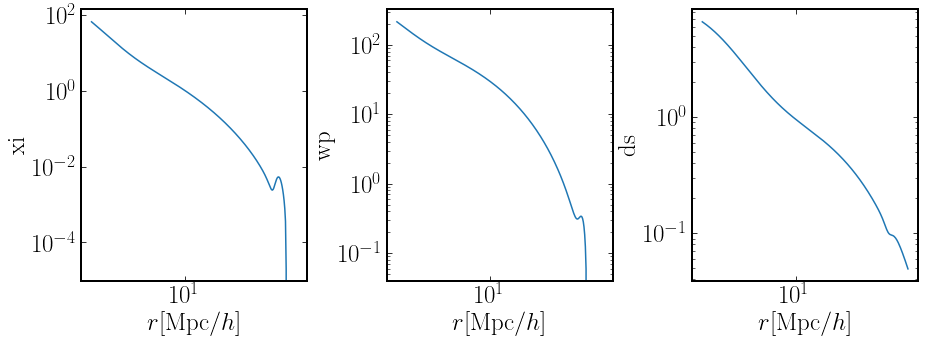

In [7]:
fig, axes = plt.subplots(1,3, figsize=(15,5))
plt.subplots_adjust(wspace=0.35)
for i, obs, label in zip([0,1,2], [xi,wp,ds], ['xi','wp','ds']):
    ax = axes[i]
    ax.set_ylabel(label)
    ax.set_xlabel(r'$r[\mathrm{Mpc}/h]$')
    ax.loglog(r, obs)
plt.show()